In [1]:
import numpy as np
import pandas as pd


from utils.data import extract_eeg_data, multi_to_binary_classification, split_dataset, dict_to_arr
from utils.labels import get_stai_labels
from utils.valid_recs import get_valid_recs
from utils.metrics import compute_metrics

from classifiers import EEGNet_classification, EEGNet_SSVEP_classification, EEGNet_TSGL_classification, EEGNet_DeepConvNet_classification, EEGNet_ShallowConvNet_classification
import utils.variables as v



In [2]:
valid_recs = get_valid_recs(data_type='init', output_type = 'np')
print(f'Valid recs {valid_recs}')

x_dict_ = extract_eeg_data(valid_recs, data_type='init', output_type='np')


Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002
ERROR:root:1) Failed to read data for recording P010_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_002
ERROR:root:1) Failed to read data for recording P020_S001_001
ERROR:root:1) Failed to read data for recording P023_S002_002
ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016_S0

In [3]:
y_dict_ = get_stai_labels(valid_recs) 
#y_dict = get_pss_labels(valid_recs)

    SubjectNo  D1Y1  D2Y1  J1Y1  J2Y1
0           1    26    30    29    31
1           2    38    41    26    34
2           3    58    56    36    35
3           4    40    45    24    24
4           5    25    31    38    37
5           6    49    58     0     0
6           7    56    50    28    28
7           8    46    37    23    27
8           9    41    47    27    22
9          10    37    20    23    21
10         11    50    49    31    47
11         12    42    47    47    41
12         13    35    35    28    33
13         14    54    35    26    26
14         15    51    55    33    42
15         16    35    38    42    45
16         17    37    35    24    20
17         18    54    62    41    48
18         19    47    52    30    36
19         20    46    38    24    25
20         21    44    54    33    39
21         22    49    51    28    34
22         23    56    53    33    28
23         24    52    58    36    41
24         25    48    62    29    56
25         2

In [4]:
print(f" Length of data after removing invalid labels: {len(x_dict_)}")
print(f" Lenght og labels after removing invalid labels: {len(y_dict_)}")

print(y_dict_['P007_S001_002'])

 Length of data after removing invalid labels: 103
 Lenght og labels after removing invalid labels: 103
2


In [5]:
x_dict, y_dict = multi_to_binary_classification(x_dict_, y_dict_)


The extracted keys : 
['P002_S001_001', 'P002_S001_002', 'P004_S001_001', 'P004_S001_002', 'P005_S002_001', 'P005_S002_002', 'P008_S001_002', 'P009_S001_001', 'P012_S001_001', 'P012_S002_002', 'P015_S002_002', 'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P018_S002_001', 'P020_S001_002', 'P021_S001_001', 'P021_S002_002', 'P024_S002_002', 'P026_S001_001', 'P026_S001_002', 'P027_S001_002', 'P027_S002_001']

Dictionary after removal of keys from y_dict: 
 dict_keys(['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S002_001', 'P008_S002_002', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001'

In [6]:
print(f" Length of data after removing mildly stressed subjects: {len(x_dict_)}")
print(f" Lenght og labels after removing  mildly stressed subjects: {len(y_dict_)}")

 Length of data after removing mildly stressed subjects: 79
 Lenght og labels after removing  mildly stressed subjects: 79


In [7]:
train_data_dict, test_data_dict, val_data_dict, train_labels_dict, test_labels_dict, val_labels_dict = split_dataset(x_dict, y_dict)

In [8]:
print(f"Length of train data set: {len(train_data_dict)}")
print(f"Length of validation data set: {len(val_data_dict)}")
print(f"Length of test data set: {len(test_data_dict)}")

Length of train data set: 44
Length of validation data set: 16
Length of test data set: 19


In [9]:
train_data = dict_to_arr(train_data_dict)
test_data = dict_to_arr(test_data_dict)
val_data = dict_to_arr(val_data_dict)

train_labels = np.reshape(np.array(list(train_labels_dict.values())), (len(train_data),1))
test_labels = np.reshape(np.array(list(test_labels_dict.values())), (len(test_data),1))
val_labels = np.reshape(np.array(list(val_labels_dict.values())), (len(val_data),1))

print(f"Shape of train data set: {train_data.shape}")
print(f"Shape of validation data set: {val_data.shape}")
print(f"Shape of test data set: {test_data.shape}")


print(f"Shape of train labels set: {train_labels.shape}")
print(f"Shape of validation labels set: {val_labels.shape}")
print(f"Shape of test labels set: {test_labels.shape}")

Shape of train data set: (44, 8, 75000)
Shape of validation data set: (16, 8, 75000)
Shape of test data set: (19, 8, 75000)
Shape of train labels set: (44, 1)
Shape of validation labels set: (16, 1)
Shape of test labels set: (19, 1)


In [10]:
#probs_EEGNet = EEGNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [11]:
# with init_filter data, 300 epochs
probs_EEGNet_init = np.array([
                  [0.7138277, 0.28617287],
                  [0.5637057, 0.43629473],
                  [0.6218500, 0.37815124],
                  [0.7166857, 0.28331438],
                  [0.6754987, 0.32450426],
                  [0.8090515, 0.19095036],
                  [0.5339635, 0.46603800],
                  [0.2460488, 0.75395140],
                  [0.4467932, 0.55320940],
                  [0.6290466, 0.37095330],
                  [0.5762418, 0.42375806],
                  [0.1861840, 0.81381420],
                  [0.6687245, 0.33127743],
                  [0.7082854, 0.29171503],
                  [0.5183024, 0.48169836],
                  [0.7217397, 0.27826140],
                  [0.6201925, 0.37980822],
                  [0.6769989, 0.32300153],
                  [0.4880893, 0.51191190]])


preds_EEGNet = probs_EEGNet_init.argmax(axis = -1)  
print(preds_EEGNet)
print(test_labels[:,0].T)

performance_EEGNet = compute_metrics(test_labels, preds_EEGNet)
print(performance_EEGNet)



[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1]
[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]

 Confusion matrix:
[[8 3]
 [7 1]]
[47.37 53.33 25.  ]


In [12]:
#probs_SSVEP = EEGNet_SSVEP_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [13]:
'''print(probs_SSVEP)
preds_SSVEP = probs_SSVEP.argmax(axis = -1)  
print(preds_SSVEP)
print(test_labels.T)

performance_SSVEP = compute_metrics(test_labels, preds_SSVEP)
print(performance_SSVEP)'''

'print(probs_SSVEP)\npreds_SSVEP = probs_SSVEP.argmax(axis = -1)  \nprint(preds_SSVEP)\nprint(test_labels.T)\n\nperformance_SSVEP = compute_metrics(test_labels, preds_SSVEP)\nprint(performance_SSVEP)'

Epoch 1/300

Epoch 1: val_loss improved from inf to 6.27307, saving model to /tmp\checkpoint.h5
2/2 - 23s - loss: 4.0190 - accuracy: 0.4773 - val_loss: 6.2731 - val_accuracy: 0.6875 - 23s/epoch - 12s/step
Epoch 2/300

Epoch 2: val_loss improved from 6.27307 to 2.36650, saving model to /tmp\checkpoint.h5
2/2 - 20s - loss: 3.7352 - accuracy: 0.7955 - val_loss: 2.3665 - val_accuracy: 0.6875 - 20s/epoch - 10s/step
Epoch 3/300

Epoch 3: val_loss improved from 2.36650 to 1.98935, saving model to /tmp\checkpoint.h5
2/2 - 20s - loss: 2.9717 - accuracy: 1.0000 - val_loss: 1.9894 - val_accuracy: 0.6875 - 20s/epoch - 10s/step
Epoch 4/300

Epoch 4: val_loss improved from 1.98935 to 1.86849, saving model to /tmp\checkpoint.h5
2/2 - 20s - loss: 2.8628 - accuracy: 1.0000 - val_loss: 1.8685 - val_accuracy: 0.5000 - 20s/epoch - 10s/step
Epoch 5/300

Epoch 5: val_loss improved from 1.86849 to 1.71422, saving model to /tmp\checkpoint.h5
2/2 - 20s - loss: 2.6239 - accuracy: 1.0000 - val_loss: 1.7142 - val

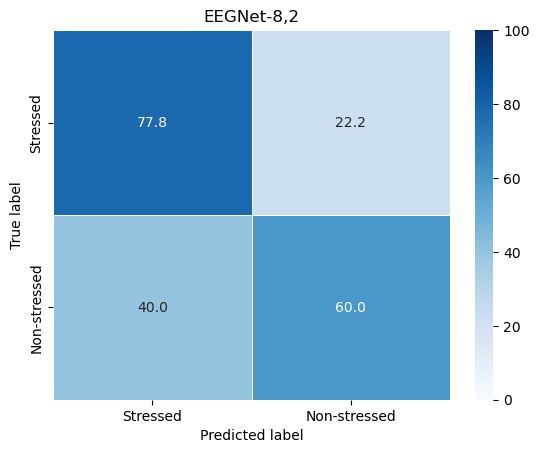

In [14]:
probs_TSGL = EEGNet_TSGL_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [22]:
print(probs_TSGL)
preds_TSGL = probs_TSGL.argmax(axis = -1)  
print(preds_TSGL)
print(test_labels[:,0].T)

performance_TSGL = compute_metrics(test_labels, preds_TSGL)
print(performance_TSGL)

[[0.34468523 0.65531474]
 [0.4223048  0.5776952 ]
 [0.66058546 0.33941454]
 [0.82226074 0.1777392 ]
 [0.8576841  0.142316  ]
 [0.79356056 0.2064394 ]
 [0.43697017 0.5630298 ]
 [0.23311326 0.7668868 ]
 [0.06507578 0.93492424]
 [0.48482734 0.5151727 ]
 [0.5046285  0.49537155]
 [0.68665516 0.3133448 ]
 [0.46980935 0.5301907 ]
 [0.55152243 0.4484776 ]
 [0.11421819 0.8857818 ]
 [0.25776443 0.74223554]
 [0.45055872 0.5494413 ]
 [0.7503406  0.24965943]
 [0.5944622  0.40553778]]
[1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0]
[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]

 Confusion matrix:
[[7 4]
 [2 6]]
[68.42 77.78 60.  ]


In [23]:
# with init data, 300 epochs
probs_TSGL_init = np.array([[0.34468523, 0.65531474],
                            [0.4223048,  0.5776952 ],
                            [0.66058546, 0.33941454],
                            [0.82226074, 0.1777392 ],
                            [0.85768410, 0.142316  ],
                            [0.79356056, 0.2064394 ],
                            [0.43697017, 0.5630298 ],
                            [0.23311326, 0.7668868 ],
                            [0.06507578, 0.93492424],
                            [0.48482734, 0.5151727 ],
                            [0.50462850, 0.49537155],
                            [0.68665516, 0.3133448 ],
                            [0.46980935, 0.5301907 ],
                            [0.55152243, 0.4484776 ],
                            [0.11421819, 0.8857818 ],
                            [0.25776443, 0.74223554],
                            [0.45055872, 0.5494413 ],
                            [0.75034060, 0.24965943],
                            [0.59446220, 0.40553778]])

Epoch 1/300

Epoch 1: val_loss improved from inf to 7.76122, saving model to /tmp\checkpoint.h5
2/2 - 14s - loss: 3.6783 - accuracy: 0.5227 - val_loss: 7.7612 - val_accuracy: 0.5625 - 14s/epoch - 7s/step
Epoch 2/300

Epoch 2: val_loss did not improve from 7.76122
2/2 - 12s - loss: 67.7632 - accuracy: 0.4773 - val_loss: 8.2938 - val_accuracy: 0.6875 - 12s/epoch - 6s/step
Epoch 3/300

Epoch 3: val_loss did not improve from 7.76122
2/2 - 12s - loss: 21.4602 - accuracy: 0.5682 - val_loss: 14.4481 - val_accuracy: 0.5625 - 12s/epoch - 6s/step
Epoch 4/300

Epoch 4: val_loss did not improve from 7.76122
2/2 - 12s - loss: 16.4019 - accuracy: 0.5455 - val_loss: 18.4597 - val_accuracy: 0.4375 - 12s/epoch - 6s/step
Epoch 5/300

Epoch 5: val_loss improved from 7.76122 to 5.28741, saving model to /tmp\checkpoint.h5
2/2 - 12s - loss: 10.7277 - accuracy: 0.6818 - val_loss: 5.2874 - val_accuracy: 0.5625 - 12s/epoch - 6s/step
Epoch 6/300

Epoch 6: val_loss improved from 5.28741 to 3.67839, saving model 

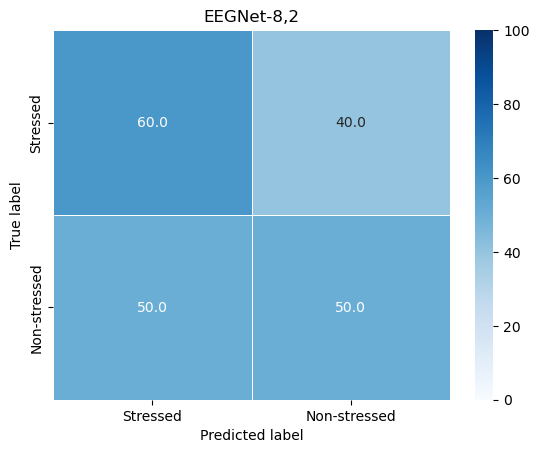

In [24]:
probs_Deep = EEGNet_DeepConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [25]:
print(probs_Deep)
preds_Deep = probs_Deep.argmax(axis = -1)  
print(preds_Deep)
print(test_labels.T)

performance_Deep = compute_metrics(test_labels, preds_Deep)
print(performance_Deep)

[[7.0045400e-01 2.9954603e-01]
 [7.8413427e-01 2.1586572e-01]
 [7.1874863e-01 2.8125137e-01]
 [9.9979991e-01 2.0014797e-04]
 [2.9218609e-02 9.7078133e-01]
 [9.9454159e-01 5.4584546e-03]
 [5.5008806e-02 9.4499117e-01]
 [9.6587259e-01 3.4127403e-02]
 [6.3271725e-01 3.6728275e-01]
 [9.8455411e-01 1.5445878e-02]
 [8.1000119e-01 1.8999882e-01]
 [9.9752015e-01 2.4798173e-03]
 [9.8586375e-01 1.4136297e-02]
 [4.3618846e-01 5.6381154e-01]
 [1.4959927e-01 8.5040075e-01]
 [9.5763546e-01 4.2364582e-02]
 [9.9997401e-01 2.5972882e-05]
 [9.9117404e-01 8.8259308e-03]
 [9.9719328e-01 2.8067816e-03]]
[0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]]

 Confusion matrix:
[[9 2]
 [6 2]]
[57.89 60.   50.  ]


In [27]:
probs_Deep_init = np.array([[7.0045400e-01, 2.9954603e-01],
                            [7.8413427e-01, 2.1586572e-01],
                            [7.1874863e-01, 2.8125137e-01],
                            [9.9979991e-01, 2.0014797e-04],
                            [2.9218609e-02, 9.7078133e-01]
                            [9.9454159e-01, 5.4584546e-03],
                            [5.5008806e-02, 9.4499117e-01],
                            [9.6587259e-01, 3.4127403e-02],
                            [6.3271725e-01, 3.6728275e-01],
                            [9.8455411e-01, 1.5445878e-02],
                            [8.1000119e-01, 1.8999882e-01],
                            [9.9752015e-01, 2.4798173e-03],
                            [9.8586375e-01, 1.4136297e-02],
                            [4.3618846e-01, 5.6381154e-01],
                            [1.4959927e-01, 8.5040075e-01],
                            [9.5763546e-01, 4.2364582e-02],
                            [9.9997401e-01, 2.5972882e-05],
                            [9.9117404e-01, 8.8259308e-03],
                            [9.9719328e-01, 2.8067816e-03]])

<>:5: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:5: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\annej\AppData\Local\Temp\ipykernel_14032\2687471855.py:5: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [2.9218609e-02, 9.7078133e-01]


TypeError: list indices must be integers or slices, not tuple

In [ ]:
#probs_Shallow = EEGNet_ShallowConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [ ]:
print(probs_Shallow)
preds_Shallow = probs_Shallow.argmax(axis = -1)  
print(preds_Shallow)
print(test_labels.T)

performance_Shallow = compute_metrics(test_labels, preds_Shallow)
print(performance_Shallow)